# Spatial Data

:::{admonition} Lesson Content
:class: note, dropdown

- raster vs. vector data
- The earth as a coordinate system; bounding boxes
- geodesy and UTM grids
- `shapely` vector object library

:::

## Context

Spatial data, as defined by software firm [Safe](https://www.safe.com/what-is/spatial-data/) is:

> a term used to describe any data related to or containing information about a specific location on the Earth’s surface

As earth scientists we are all about the earth's surface! Our data is inherently spatial.  Very little (or nothing) that we do is disconnected from location.  Learning how to deal with location, then, is a key part of learning to code for earth science research.

## Vector data vs. Raster data

Spatial data is most often divided between two types: 
1. **raster data** - made up of a continuous matrix of cells that each hold specific values
2. **vector data** - data storing discrete boundaries with attached attributes

<img src="https://i.ytimg.com/vi/zgAXPyU3euo/maxresdefault.jpg" width=600>

Lidar has become increasingly prevelent, and though it is often represented in raster file formats has also been called "the third branch of geospatial data".

:::{admonition} 📝 Check your understanding
:class: tip

What is the best type of data structure for each dataset?

1. temperature output from a weather model of spatitially continuous temperature predicitions
2. temperature taken from individual ground stations
4. whole air samples taken on an airplane flight
5. elevation across an entire state

:::

## Geodesy

**geodesy** is the science of understanding and measureing the earth's shape.  There are people who spend their whole careers as geodesists.  Geodesy and mapping is an integral part of **georeferencing** your data - or placing your data in space.  Without georeferencing raster datasets are just pretty images that could have been taken anywhere in the world, or not on this world at all.

The three concepts we will be distinguishing between today are:
1. ellipsoids and datums - define the shape of the earth
2. map projections - define how we put a round earth on a flat map
3. coordinate reference systems - define how we define distances on the flat map

````{panels}
:column: col-lg-12 p-2
Vocabulary
^^^^^^^^^^^^^^
**Georeferencing:** The process of assigning a data value a location in space.

````

### Ellipsoids and Datums

The earth is not a perfect circle. It isn't even a perfect squished circle. It's bumpy with mountain ranges, ocean topography (bathymetry) and ice sheets. Because of this, in order to define where something is we have to first agree on a basic starting shape for the earth. The agreed upon starting shape is called the **ellipsoid** and agreeing upon where to center that shape is called the **datum**.

Geodesists have defined the shape of an ellipsoid which is believed to best align with the shape of the earth.  The mostly commonly used ellisoid is the WGS 84 ellipsoid which was defined in 1984. In addition to defining the size of the ellipsoid we also need to define where the center of the ellipsoid should sit so that it is acurrate for as many places on earth at once.  Defining where to put the ellipsoid is called the datum.

![Datums](./images/datums.png)

Together the ellipsoid and the datum become the mathematical definition of the earth's surface.

### Map Projections

The ellipsoid is a 3D shape.  Map projections are the result of taking a 3D shape and turning it into being 2D.

<img src="https://tomroth.com.au/projections/map-projections.png" width=500>

There are [an insane number of ways to do this](https://xkcd.com/977/) and they are grouped into different families.  The most important takeaway is just to know that when you convert a 3D object into a 2D you aren't going to be able to be accurate in every aspect.  Something has to sacrifice.  It might be relative size or it might be straight lines but everything can't be perfect on a given map projection.

![Projection Distortion](./images/projection_distortion.png)

### Coordinate Reference Systems (CRS)

Once you lay out your 2d surface representing the earth you next need to label the map so you can refer to points on that surface.  The system you uses for labelling points on the map is a **coordinate reference system (crs)**.

CRS fit into two main categories:
* units of degrees (ex. latitude and longitude) - geographic CRS
* units of distance (ex. meters, kilometers, miles, ...) - projected CRS

The units of a CRS will be a piece of information that you use frequently when working with spatial data.

Knowing what type of CRS you are using is important for measuring distances. If you have a dataset in degrees the benefit is that it is usually intuitive to think of data in latitude and longitudes. The downside is that if you ask a program about the distance between two things it will give you an answer back in degrees.

In a projected system the general location of the image can be counter intuitive, but the distances from one point to another are easier because they will be returned to you in the units of the coordiante system.

:::{admonition} 📝 Check your understanding
:class: tip

What purpose does each of the three elements of geodesy serve?

1. Ellipsoid + Datum
2. Map projection
3. Coordinate Reference System

:::

:::{admonition} 📝 Check your understanding
:class: tip

What is the difference between a projected and a geographic coordinate system? What are the units in each one?

:::

## Standardized Geodesy: EPSG Codes

We aren't talking about geodesy to do a deep dive into it, but we do need to understand that any geospatial data we look at is going to need to communicate to us how they are describing place and distance. 

One common way to do that is with **EPSG codes**.  These codes assign an integer number to many of the common map projection/crs combinations.

Really common projections include:

* EPSG:4326 - what most people think of as "regular" latitude/longitude coordinates
* EPSG:3857 - Web mercator, the projection used by Google maps and most web maps.  The de facto standard of web mapping. Nice for distance calculations on most parts of the globe.

:::{admonition} 📝 Check your understanding
:class: tip

Look at the epsg.io page for the 4326 projection (www.epsg.io/4326). What are the units of that projection?

:::

## All the world's a coordinate system

A map of the world:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Mercator_projection_Square.JPG/350px-Mercator_projection_Square.JPG" width=450>

We are familiar with a map like this. Latitudes run horizontally east/west and longitudes run vertically north and south.

There are several ways to represent coordinates, but when we are representing coordinate locations on a computer we typically use decimal degrees: 

35 degrees 30 mintes = 35.5 degrees

We also use a negative sign to denote the southern and western hemisphere:

112 W, 15 S = -112, -15

While this all is generally approachable it can get easy to get turned around when you're in the nitty gritty of coordinates with your data.  One visual I like to keep myself on track is that the coordinate system on our map is just that, a coordinate system just like they x and y planes in math class.

![Map with CRS](./images/crs_map.jpg)

### Bounding Boxes

Bounding boxes represent the minimum and maxiumum coordinates of the dataset.  These are often latitude and longitude lines, but the bounding box is given the units of whatever dataset the raster is using.  AVIRIS, for example, uses a UTM grid (more detail later) so the units of the bounding box are meters.

![Bounding Boxs](./images/bounding_box.png)

In this example the outline of Italy is shown in red and the bounding box for Italy, which follows the minimum and maximum latitude and longitude lines, is shown in black.

Bounding boxes are often written as a list of coordinates in the format `[minimum_x minimum_y maximum_x maximum_y]`.  So for our Italy example the bounding box would be `[6.634, 36.62, 18.511, 47.08]`.

When translating between north/south/east/west and x/y coordinates:
* `minimum_x` -> most western
* `minimum_y` -> most southern
* `maximum_x` -> most eastern
* `maximum_y` -> most northern

:::{admonition} 📝 Check your understanding
:class: tip

Pull up Google maps or your favorite mapping appliation and zoom into the state of California. Click the map to view latitude and longitude locations for the edges.  Write down an approximate bounding box (to ~the nearest half of a degree) for the state in the form `[minimum_x minimum_y maximum_x maximum_y]`

:::

## UTM Grids

The Universal Transverse Mercator (UTM) projected coordinate system that covers the entire earth.  The system is broken up into 60 zones, each 6 degrees longitude wide, that span from the south to the north pole.

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
# UTM grid zones
Image(url= "https://gisgeography.com/wp-content/uploads/2016/05/UTM-Zones-Globe-2.png", width=330)

Notice in the image how the area covered by each zone is widest at the equator and gets skinnier towards the poles.

### Easting and Northing

Instead of latitude and longitude the UTM grid system uses a northing and an easting, respectively.
- Longtude -> Eastings.  Eastings are measured from the central meridian, which has a value of 500,000m.
- Latitude -> Northings.  Northings are measured from the from the equator, which has a value of 0 for the northern hemisphere and 10,000,000m for the southern hemisphere.

Some benefits of UTM:
- All values of eastings/northings are positive, so there are no negative numbers nor is there an East-West designation
- constant distance relationship anywhere on the map

In [3]:
Image(url= "https://www.maptools.com/images/28ad74e.png", width=360)

The x direction should only range from about 0 to 1,000,000 where as the y direction could range from 0 to about 10,000,000.

:::{admonition} 📝 Check your understanding
:class: tip

What is the set of coordinates corresponding to the exact center of a northern hemisphere UTM grid at the equator?

:::

### EPSG codes for UTM grids

Each grid has its own EPSG code, meaning there are 120 total EPSG codes total for UTM grids.  Luckily there is an order to how these codes are assigned.


* northern hemisphere - 326{zone number}
* southern hemisphere - 327(zone number}


To visually reference UTM grid zone numbers I use the image from [this website](http://www.dmap.co.uk/utmworld.htm) as a reference:

In [4]:
# UTM grid zones
Image(url= "http://www.dmap.co.uk/utmworld.gif")

Another source to referenece is epsg.io.  Type the name of the reference system you are interested in to find information or view it on a map. Ex. https://epsg.io/32630 or https://epsg.io/4326

:::{admonition} 📝 Check your understanding
:class: tip

What is the EPSG code for the UTM zone covering most of Ireland?

:::

## Back to Coding

### `shapely` objects
`shapely` is a library for handling vector data.  It has objects for `Point`s, `LineString`s, `LineRing`s,and `Polygon`s. `Point`s and `Polygon`s are what we will primarily use.

See also:
* [medium article](https://towardsdatascience.com/geospatial-adventures-step-1-shapely-e911e4f86361)

#### Creating a `Point()`
You create a `shapely` object by giving it a set of coordinates, in the format (x, y).

**Notice!** x, y for degree coordinates is longitude, latitude

In [5]:
from shapely.geometry import Point

In [6]:
point = Point(0.0, 0.0)
print(point)

POINT (0 0)


In [7]:
Point(0,0).distance(Point(3,4))

5.0

In [8]:
list(Point(4,3).coords)

[(4.0, 3.0)]

#### Creating a `Polygon()`

In [9]:
from shapely.geometry import Polygon

In [10]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])

When you create a `Polygon` object you get extra properties that tell you something about your object

In [11]:
print(polygon.area)
print(polygon.length)
print(polygon.bounds)

0.5
3.414213562373095
(0.0, 0.0, 1.0, 1.0)


#### Creating a Bounding Box

When we create a bounding box in code the order of inputs is:
`minx`, `miny`, `maxx`, `maxy`

In [12]:
from shapely.geometry import box

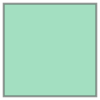

In [13]:
box(10, -15, 20, -5)

#### Example
Creating a bounding box Python object for the bounding box of Italy in the image above

In [14]:
bbox_italy = box(6.634, 36.62, 18.51, 47.08)

In [15]:
bbox_italy.area

124.22296000000003

### Operations with spatial objects

Just like addition or multiplication are operations for numbers, we also have operations we can run on spatial data which are unique.  Here are a few common ones:

<img src="https://docs.qgis.org/2.8/en/_images/overlay_operations.png">

Another common one is a buffer: 
<img src="https://saylordotorg.github.io/text_essentials-of-geographic-information-systems/section_11/5c7eb6fc4bcbfc5117d778f0aabfded6.jpg" width=550>

In [16]:
bbox_italy = box(6.634, 36.62, 18.51, 47.08)

In [17]:
bbox_example = box(12.5, 36, 22.7, 49.3)

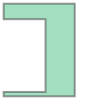

In [18]:
bbox_example - bbox_italy

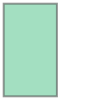

In [19]:
bbox_example.intersection(bbox_italy)

#### An example of buffer using the shape of California

In [20]:
import json
from shapely.geometry import shape

In [21]:
# Opening a geojson and convering to a shapely object.  We'll talk about this again below
with open('./data/california.geojson') as f:
    ca_geom_json = json.load(f)
ca_geom = shape(ca_geom_json['geometry'])

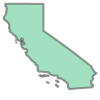

In [22]:
ca_geom

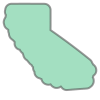

In [23]:
ca_geom.buffer(0.8)

:::{admonition} 📝 Check your understanding
:class: tip

In the image below we have a shape `purple`, `tan` and `green`.  What is the operation that was used on `purple` and `tan` to get green shape?

<img src="https://gisgeography.com/wp-content/uploads/2020/10/Erase-Tool-3D-550x178.jpg">

:::

## Different Ways to Represent Spatial Objects

While Python objects are nice, they aren't great if you are trying to take your objects out of Python.  For example, maybe you drew out a custom shape in QGIS that you want to use or you defined an ROI in ENVI and you want to import those into your Python code.

Shapefiles are a really common way to move shapes around.  Opening those is a little more involved so we won't look at those right now, but I will briefly mention two other common representations that are text-based: GeoJSON and WKT.

### geojson

Geojson is a specific flavor of the very common JSON format.  JSON format is a way of sending data that looks just like a Python dictionary but it is used much more broadly than just Python.

Links:
* [geojson.org](https://geojson.org/) - the full specification
* [geojson.tools](https://geojson.tools/) - for quick visualization of geojson objects

In [24]:
armstrong_geojson = {
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [-117.89, 34.94]
  },
  "properties": {
    "name": "Armstrong Flight Research Center"
  }
}

The geojson acts  just like a Python dictionary.

In [25]:
armstrong_geojson['geometry']

{'type': 'Point', 'coordinates': [-117.89, 34.94]}

In [26]:
from shapely.geometry import shape

In [27]:
armstrong_geometry = shape(armstrong_geojson['geometry'])

In [28]:
list(armstrong_geometry.coords)

[(-117.89, 34.94)]

#### Loading a geojson from a file

In [29]:
import json

In [30]:
with open('./data/california.geojson') as f:
    out = json.load(f)

In [31]:
ca_geom = shape(out['geometry'])

### WKT

WKT stands for "Well Known Text".  It is another way of saving vector geometries.

In [32]:
armstrong_geometry.wkt

'POINT (-117.89 34.94)'